Kaggle House prices : Advenced regression techniques


In [39]:
import pandas as pd
import numpy as np
import seaborn as sbµ

In [40]:
df_train = pd.read_csv("train.csv")

#df_prix = df_train["SalePrice"]
#df_train = df_train.drop(["SalePrice"], axis = 1)

#df_train.info()

In [41]:
#Valeurs manquantes pour les colonnes LotFrontage, Alley, YearRemodAdd, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, 
#BsmtExposure ,BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual       
#GarageCond, PoolQC, Fence, MiscFeature

#df_train.dtypes
#+34 variables sont de types objets

#les variables :
##SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

#MSSubClass: The building class
#MSZoning: The general zoning classification
#LotFrontage: Linear feet of street connected to property
#LotArea: Lot size in square feet
#Street: Type of road access
#Alley: Type of alley access
#LotShape: General shape of property
#LandContour: Flatness of the property
#Utilities: Type of utilities available
#LotConfig: Lot configuration
#LandSlope: Slope of property
#Neighborhood: Physical locations within Ames city limits

##Condition1: Proximity to main road or railroad

#Condition2: Proximity to main road or railroad (if a second is present)
#BldgType: Type of dwelling
    
##HouseStyle: Style of dwelling
    
#OverallQual: Overall material and finish quality
#OverallCond: Overall condition rating
    
##YearBuilt: Original construction date
##YearRemodAdd: Remodel date
    
#RoofStyle: Type of roof
#RoofMatl: Roof material
#Exterior1st: Exterior covering on house
#Exterior2nd: Exterior covering on house (if more than one material)
#MasVnrType: Masonry veneer type
    
##MasVnrArea: Masonry veneer area in square feet
    
#ExterQual: Exterior material quality
#ExterCond: Present condition of the material on the exterior 
#Foundation: Type of foundation
    
##BsmtQual: Height of the basement
    
#BsmtCond: General condition of the basement
#BsmtExposure: Walkout or garden level basement walls
#BsmtFinType1: Quality of basement finished area
#BsmtFinSF1: Type 1 finished square feet
#BsmtFinType2: Quality of second finished area (if present)
#BsmtFinSF2: Type 2 finished square feet
#BsmtUnfSF: Unfinished square feet of basement area
    
##TotalBsmtSF: Total square feet of basement area
##Heating: Type of heating
    
#HeatingQC: Heating quality and condition
    
##CentralAir: Central air conditioning
##Electrical: Electrical system
##1stFlrSF: First Floor square feet
##2ndFlrSF: Second floor square feet
    
#LowQualFinSF: Low quality finished square feet (all floors)
#GrLivArea: Above grade (ground) living area square feet
#BsmtFullBath: Basement full bathrooms
#BsmtHalfBath: Basement half bathrooms
#FullBath: Full bathrooms above grade
#HalfBath: Half baths above grade
    
##Bedroom: Number of bedrooms above basement level
##Kitchen: Number of kitchens
    
#KitchenQual: Kitchen quality
    
##TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    
#Functional: Home functionality rating
#Fireplaces: Number of fireplaces
#FireplaceQu: Fireplace quality
    
##GarageType: Garage location
    
#GarageYrBlt: Year garage was built
#GarageFinish: Interior finish of the garage
#GarageCars: Size of garage in car capacity
#GarageArea: Size of garage in square feet
#GarageQual: Garage quality
#GarageCond: Garage condition
    
##PavedDrive: Paved driveway
##WoodDeckSF: Wood deck area in square feet
##OpenPorchSF: Open porch area in square feet
##EnclosedPorch: Enclosed porch area in square feet
##3SsnPorch: Three season porch area in square feet
##ScreenPorch: Screen porch area in square feet
##PoolArea: Pool area in square feet
    
#PoolQC: Pool quality
    
##Fence: Fence quality
    
#MiscFeature: Miscellaneous feature not covered in other categories
#MiscVal: $Value of miscellaneous feature
#MoSold: Month Sold

##YrSold: Year Sold

#SaleType: Type of sale
#SaleCondition: Condition of sale


In [42]:
#sb.heatmap(df_train.corr(), annot=True)

#matrice difficielement lisible tel quel (80 variables)
#Je choisi arbitrairement de conserver 30 variables et de supprimer les autres :

#MSSubClass: The building class
#MSZoning: The general zoning classification
#LotFrontage: Linear feet of street connected to property
#LotArea: Lot size in square feet
#Street: Type of road access
#Alley: Type of alley access
#LotShape: General shape of property
#LandContour: Flatness of the property
#Utilities: Type of utilities available
#LotConfig: Lot configuration
#LandSlope: Slope of property
#Neighborhood: Physical locations within Ames city limits
#Condition2: Proximity to main road or railroad (if a second is present)
#BldgType: Type of dwelling
#OverallQual: Overall material and finish quality
#OverallCond: Overall condition rating
#RoofStyle: Type of roof
#RoofMatl: Roof material
#Exterior1st: Exterior covering on house
#Exterior2nd: Exterior covering on house (if more than one material)
#MasVnrType: Masonry veneer type
#ExterQual: Exterior material quality
#ExterCond: Present condition of the material on the exterior 
#Foundation: Type of foundation
#BsmtCond: General condition of the basement
#BsmtExposure: Walkout or garden level basement walls
#BsmtFinType1: Quality of basement finished area
#BsmtFinSF1: Type 1 finished square feet
#BsmtFinType2: Quality of second finished area (if present)
#BsmtFinSF2: Type 2 finished square feet
#BsmtUnfSF: Unfinished square feet of basement area
#HeatingQC: Heating quality and condition
#LowQualFinSF: Low quality finished square feet (all floors)
#GrLivArea: Above grade (ground) living area square feet
#BsmtFullBath: Basement full bathrooms
#BsmtHalfBath: Basement half bathrooms
#FullBath: Full bathrooms above grade
#HalfBath: Half baths above grade
#KitchenQual: Kitchen quality
#Functional: Home functionality rating
#Fireplaces: Number of fireplaces
#FireplaceQu: Fireplace quality
#GarageYrBlt: Year garage was built
#GarageFinish: Interior finish of the garage
#GarageCars: Size of garage in car capacity
#GarageArea: Size of garage in square feet
#GarageQual: Garage quality
#GarageCond: Garage condition
#PoolQC: Pool quality
#MiscFeature: Miscellaneous feature not covered in other categories
#MiscVal: $Value of miscellaneous feature
#MoSold: Month Sold
#SaleType: Type of sale
#SaleCondition: Condition of sale

df_train = df_train.drop(["MSSubClass","MSZoning","LotFrontage","LotArea","Street","Alley","LotShape","LandContour",
                          "Utilities","LotConfig","LandSlope","Neighborhood","Condition2","BldgType","OverallQual",
                         "OverallCond","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","ExterQual",
                         "ExterCond","Foundation","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2",
                         "BsmtFinSF2","BedroomAbvGr","KitchenAbvGr","BsmtUnfSF","HeatingQC","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath",
                         "FullBath","HalfBath","KitchenQual","Functional","Fireplaces","FireplaceQu","GarageYrBlt",
                         "GarageFinish","GarageCars","GarageArea","GarageQual","GarageCond","PoolQC","MiscFeature",
                         "MiscVal","MoSold","SaleType","SaleCondition"], axis = 1)
# A n'éxécuter qu'une fois

In [43]:
# Listes des variables qu'on conserve :

##SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
##Condition1: Proximity to main road or railroad
##HouseStyle: Style of dwelling
##YearBuilt: Original construction date
##YearRemodAdd: Remodel date
##MasVnrArea: Masonry veneer area in square feet
##BsmtQual: Height of the basement
##TotalBsmtSF: Total square feet of basement area
##Heating: Type of heating
##CentralAir: Central air conditioning
##Electrical: Electrical system
##1stFlrSF: First Floor square feet
##2ndFlrSF: Second floor square feet
##Bedroom: Number of bedrooms above basement level
##Kitchen: Number of kitchens
##TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
##GarageType: Garage location
##PavedDrive: Paved driveway
##WoodDeckSF: Wood deck area in square feet
##OpenPorchSF: Open porch area in square feet
##EnclosedPorch: Enclosed porch area in square feet
##3SsnPorch: Three season porch area in square feet
##ScreenPorch: Screen porch area in square feet
##PoolArea: Pool area in square feet
##Fence: Fence quality
##YrSold: Year Sold

In [44]:
#On renomme les variables :

df_train = df_train.rename(index=str, columns={"Condition1" : "TypeAcces", 
                                 "HouseStyle" : "StyleStructure",
                                 "YearBuilt" : "AnneeConstruction",
                                 "YearRemodAdd" : "AnneeRenovation",
                                "MasVnrArea" : "SurfaceBrique",
                                "BsmtQual" : "HauteurMaison",
                                "TotalBsmtSF" : "SurfaceMaison",
                                "Heating" : "TypeChauffage",
                                "CentralAir" : "Climatiseur",
                                "Electrica l" : "SystemeElectrique",
                                "1stFlrSF" : "Surface1E",
                                "2ndFlrSF" : "Surface2E",
                                "Bedroom" : "NbChambres",
                                "Kitchen" : "NbCuisines",
                                "TotRmsAbvGrd" : "NbTotChambres",
                                "GarageType" : "EmplacementGarage",
                                "PavedDrive" : "RoutePavee",
                                "WoodDeckSF" : "SurfaceCoureBois",
                                "OpenPorchSF" : "SurfacePorcheExt",
                                "EnclosedPorch" : "SurfacePorcheInt",
                                "3SsnPorch" : "SurfacePorche3saisons",
                                "ScreenPorch" : "SurfaceVerenda",
                                "PoolArea" : "SurfacePiscine",
                                "Fence" : "QualiteCloture",
                                "YrSold" : "AnneeVente",
                                "SalePrice" : "PrixVente"})

In [45]:
#Remplacement des valeurs nan des colonnes concernées par un string "NA".
df_train['EmplacementGarage'] = df_train['EmplacementGarage'].fillna("NA")
df_train['QualiteCloture'] = df_train['QualiteCloture'].fillna("NA")
df_train['Electrical'] = df_train['Electrical'].fillna("NA")
df_train['HauteurMaison'] = df_train['HauteurMaison'].fillna("NA")

#On remplace les valeurs nan de la colonne SurfaceBrique par des 0

df_train['SurfaceBrique'] = df_train['SurfaceBrique'].fillna(0)


print("Type Acces : \n ",df_train["TypeAcces"].unique(),"\n")
print("StyleStructure : \n",df_train["StyleStructure"].unique(),"\n")
print("HauteurMaison : \n",df_train["HauteurMaison"].unique(),"\n")
print("TypeChauffage : \n",df_train["TypeChauffage"].unique(),"\n")
print("Climatiseur : \n",df_train["Climatiseur"].unique(),"\n")
print("Electrical : \n",df_train["Electrical"].unique(),"\n")
print("EmplacementGarage : \n",df_train["EmplacementGarage"].unique(),"\n")
print("RoutePavee : \n",df_train["RoutePavee"].unique(),"\n")
print("QualiteCloture : \n",df_train["QualiteCloture"].unique(),"\n")

Type Acces : 
  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

StyleStructure : 
 ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

HauteurMaison : 
 ['Gd' 'TA' 'Ex' 'NA' 'Fa'] 

TypeChauffage : 
 ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor'] 

Climatiseur : 
 ['Y' 'N'] 

Electrical : 
 ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' 'NA'] 

EmplacementGarage : 
 ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'NA' 'Basment' '2Types'] 

RoutePavee : 
 ['Y' 'N' 'P'] 

QualiteCloture : 
 ['NA' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw'] 



In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 25 columns):
Id                       1460 non-null int64
TypeAcces                1460 non-null object
StyleStructure           1460 non-null object
AnneeConstruction        1460 non-null int64
AnneeRenovation          1460 non-null int64
SurfaceBrique            1460 non-null float64
HauteurMaison            1460 non-null object
SurfaceMaison            1460 non-null int64
TypeChauffage            1460 non-null object
Climatiseur              1460 non-null object
Electrical               1460 non-null object
Surface1E                1460 non-null int64
Surface2E                1460 non-null int64
NbTotChambres            1460 non-null int64
EmplacementGarage        1460 non-null object
RoutePavee               1460 non-null object
SurfaceCoureBois         1460 non-null int64
SurfacePorcheExt         1460 non-null int64
SurfacePorcheInt         1460 non-null int64
SurfacePorche3saisons    1460 non

In [47]:
def bar_chart(feature):
    pricevhight = df_train[df_train['PrixVente'] > 400000][feature].value_counts()
    pricehight = df_train[(df_train['PrixVente'] < 400000) & (df_train['PrixVente'] > 300000)][feature].value_counts()
    pricemedium = df_train[(df_train['PrixVente'] < 300000) & (df_train['PrixVente'] > 200000)][feature].value_counts()
    priceintermediate = df_train[(df_train['PrixVente'] < 200000) & (df_train['PrixVente'] > 150000)][feature].value_counts()
    pricelow = df_train[(df_train['PrixVente'] < 150000) & (df_train['PrixVente'] > 100000)][feature].value_counts()
    pricevlow = df_train[df_train['PrixVente'] < 100000][feature].value_counts()
    df = pd.DataFrame([pricevhight,pricehight,pricemedium,priceintermediate,pricelow,pricevlow])
    df.index = ['PrixTElevé','PrixElevé','PrixMoyen','PrixIntermédiaire','PrixFaible','PrixTFaible']
    df.plot(kind='bar',stacked=True, figsize=(12,7))

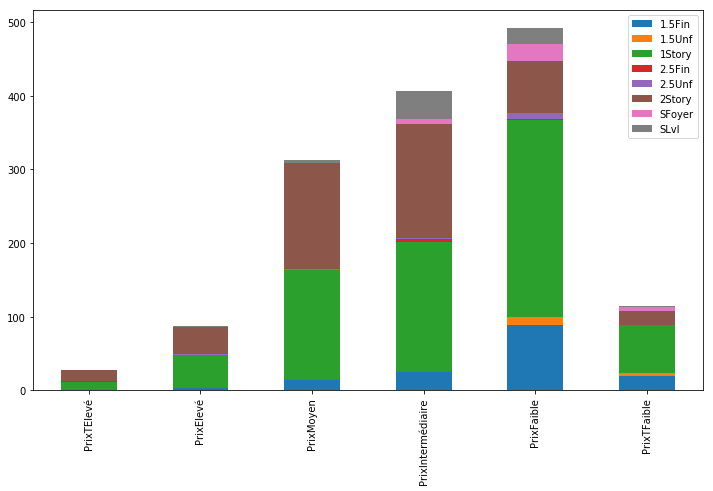

In [48]:
bar_chart('StyleStructure')

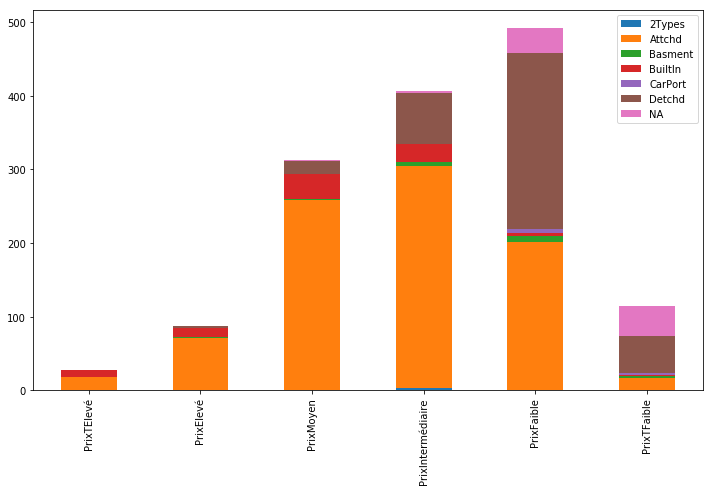

In [49]:
bar_chart("EmplacementGarage")

In [50]:
#bar_chart("AnneeConstruction")
#dates à trier selon catégories

In [52]:
#bar_chart("AnneeRenovation")
#idem

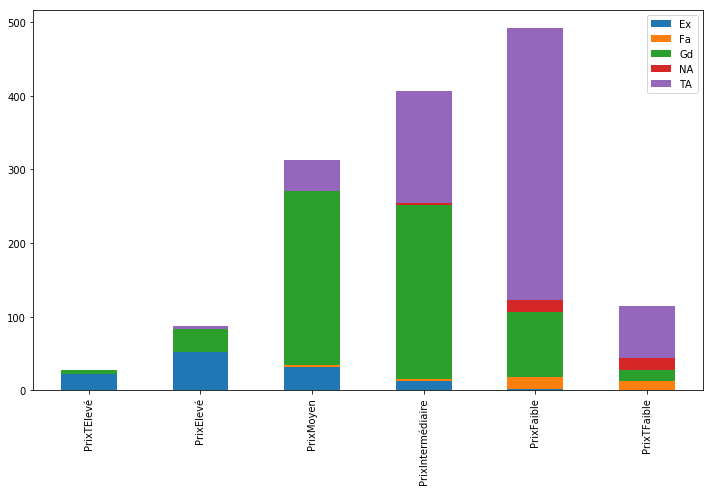

In [55]:
bar_chart("HauteurMaison")

In [57]:
#bar_chart("SurfaceMaison")
#surface à trier également

In [63]:
#bar_chart("TypeChauffage")
#à supprimer sans doutes...

In [71]:
#bar_chart("Climatiseur")
#la présence ou non d'un climatiseur influe peu sur les prix, bien qu'ils soient absent dans les maisons à pris tfaible.

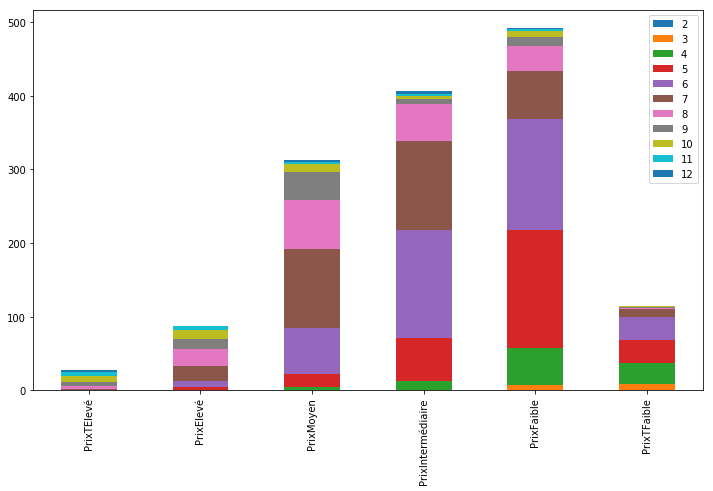

In [73]:
bar_chart("NbTotChambres")

In [74]:
#bar_chart("RoutePavee")
# certaines maisons à prix faibles et tfaible ne sont pas pavées.

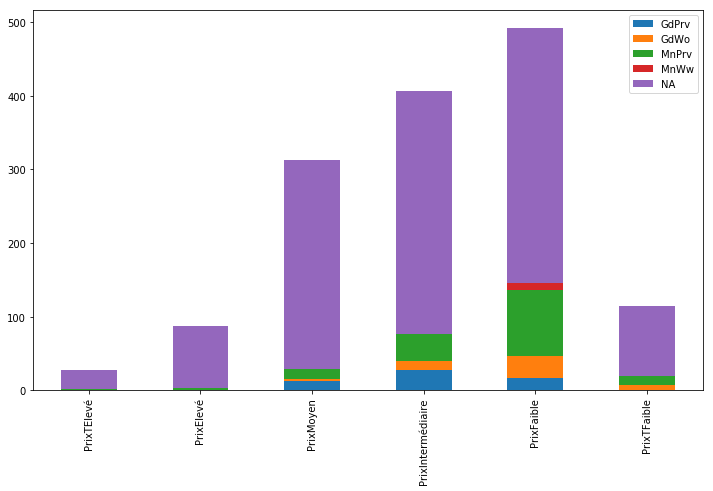

In [75]:
bar_chart("QualiteCloture")

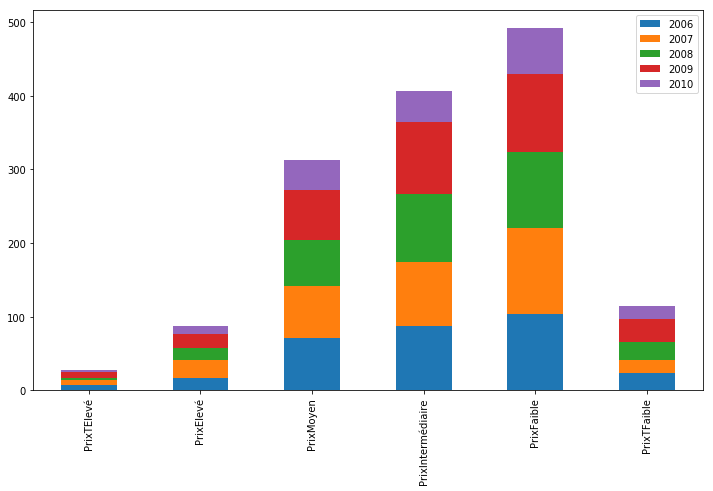

In [76]:
bar_chart("AnneeVente")